# El método del codo y el factor de la silueta del clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

/home/lautaro/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [12]:
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])
X = np.array( list(zip( x1, x2 ))).reshape(len(x1), 2) 

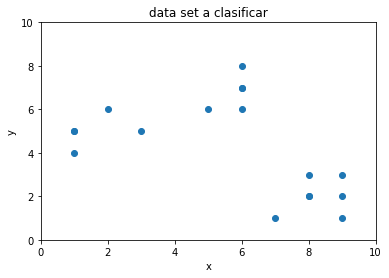

In [13]:
plt.plot()
plt.xlim( [0,10] )
plt.ylim( [0,10] )
plt.title('data set a clasificar')
plt.xlabel('x')
plt.ylabel('y')
plt.scatter(x1, x2)
plt.show()

Para k =  2  el promedio de la silueta es:  0.6113424368705715
    -Para i = 1  la silueta del cluster vale:  0.49704450958269375
    -Para i = 2  la silueta del cluster vale:  0.7746251901389686
Para k =  3  el promedio de la silueta es:  0.7122079383287169
    -Para i = 1  la silueta del cluster vale:  0.7345257364682265
    -Para i = 2  la silueta del cluster vale:  0.7322200728725188
    -Para i = 3  la silueta del cluster vale:  0.6609508863896014
Para k =  4  el promedio de la silueta es:  0.6389948643127632
    -Para i = 1  la silueta del cluster vale:  0.7345257364682265
    -Para i = 2  la silueta del cluster vale:  0.654458796162702
    -Para i = 3  la silueta del cluster vale:  0.24096929517637128
    -Para i = 4  la silueta del cluster vale:  0.655666655624379
Para k =  5  el promedio de la silueta es:  0.46983374375750137
    -Para i = 1  la silueta del cluster vale:  0.37765685097302226
    -Para i = 2  la silueta del cluster vale:  0.24096929517637128
    -Para i = 3  la

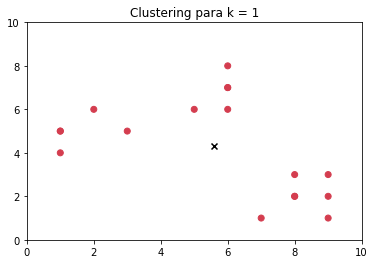

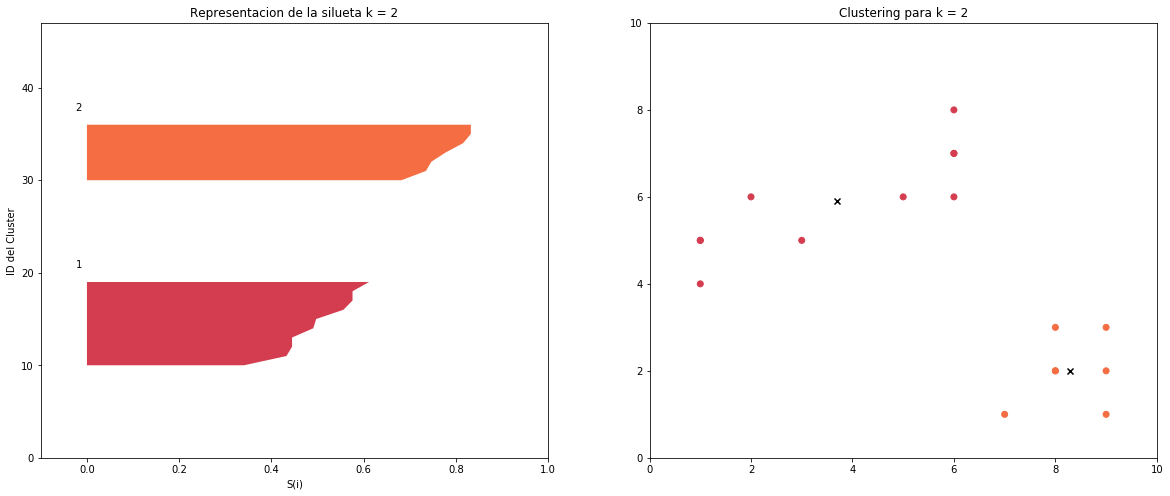

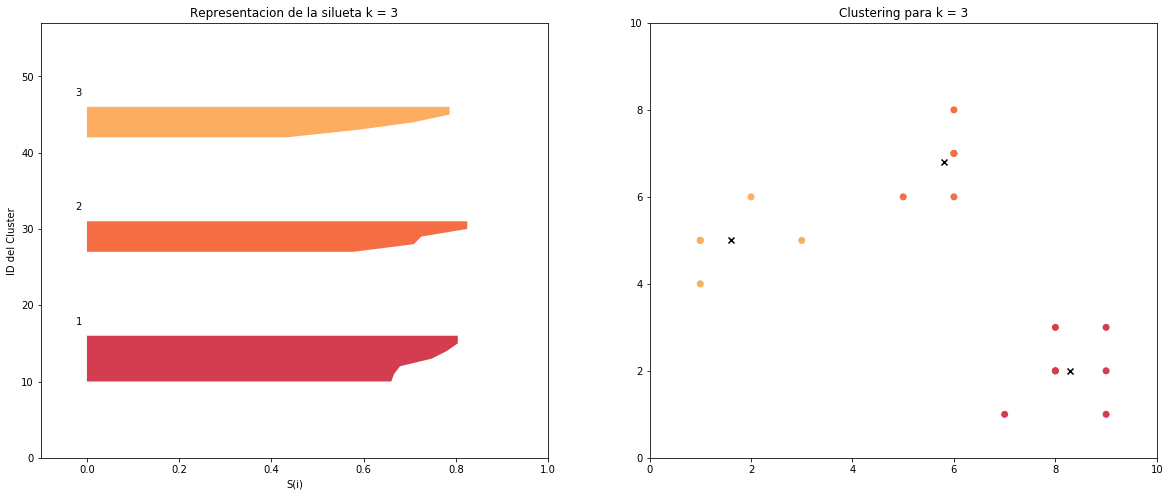

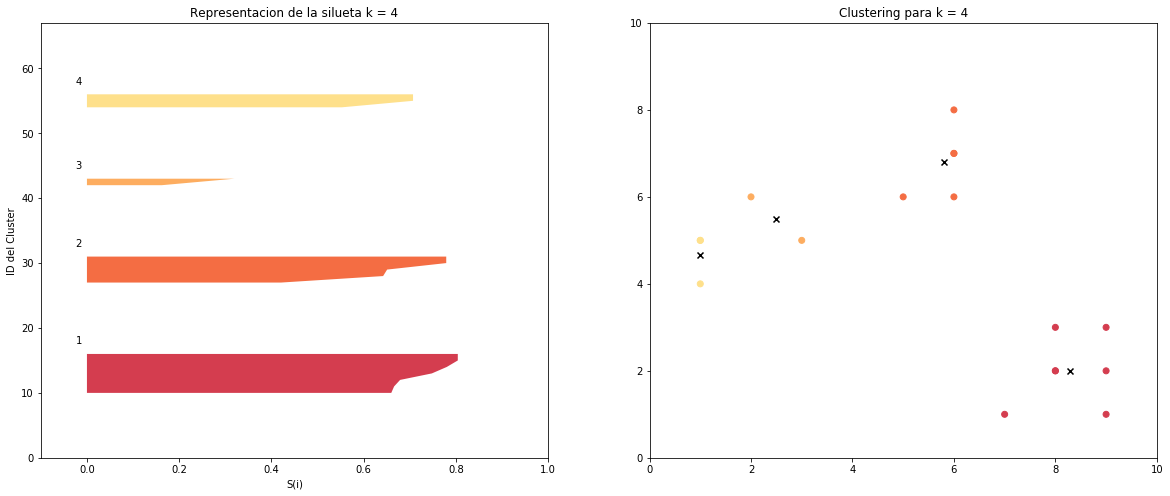

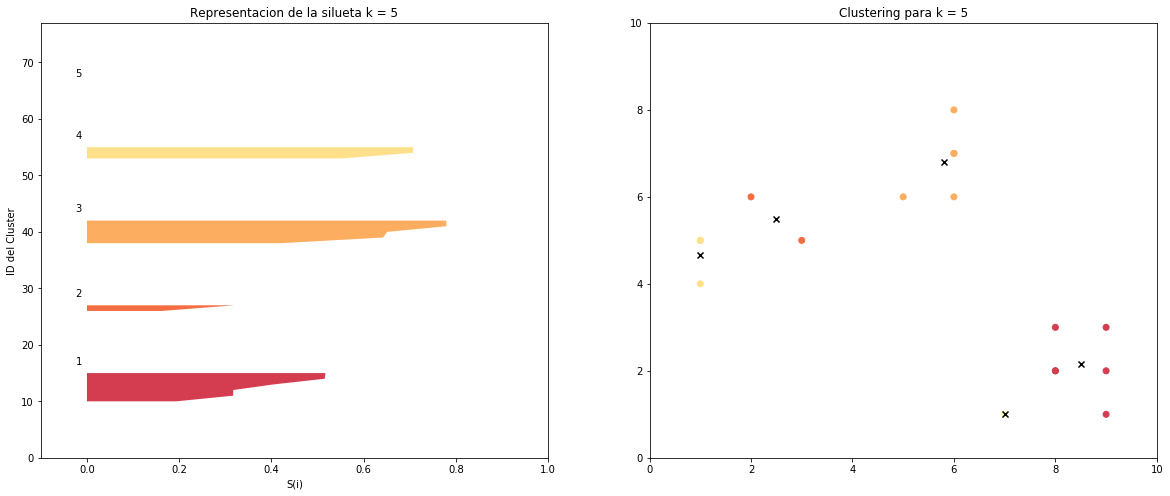

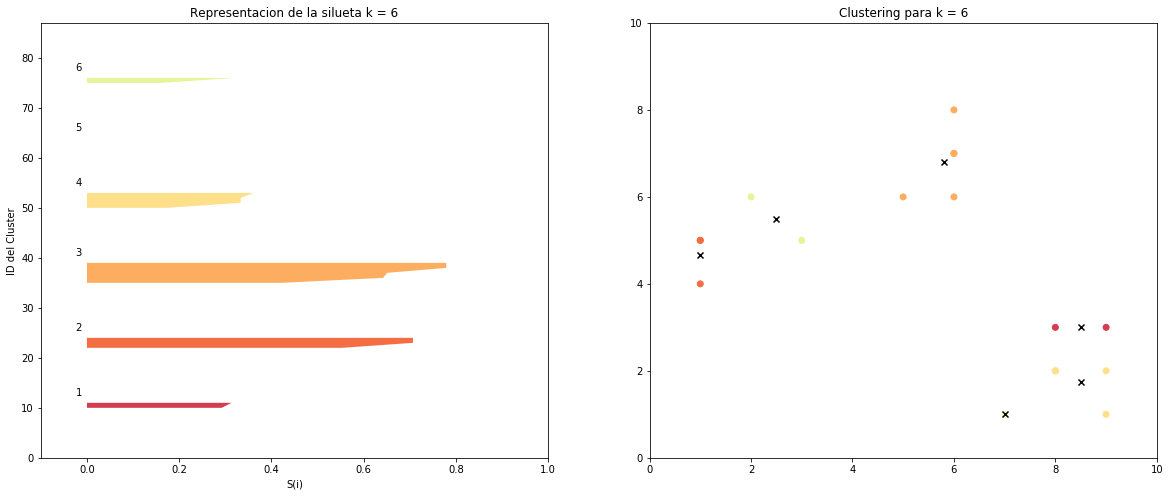

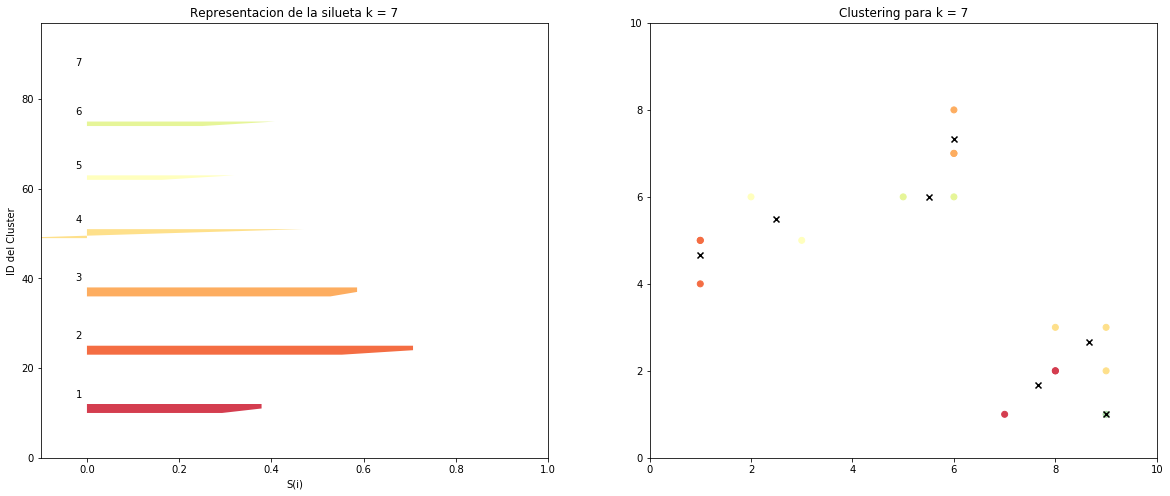

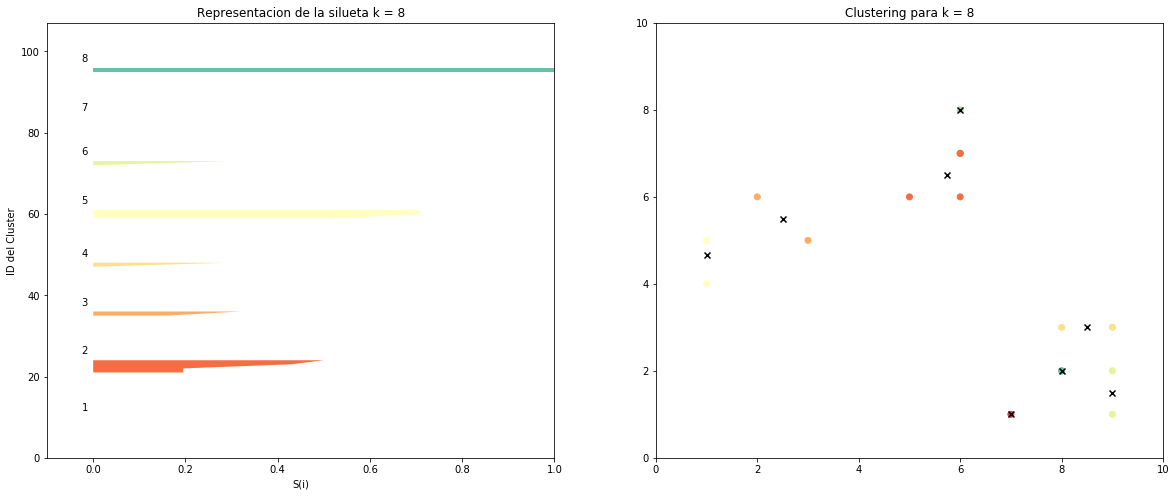

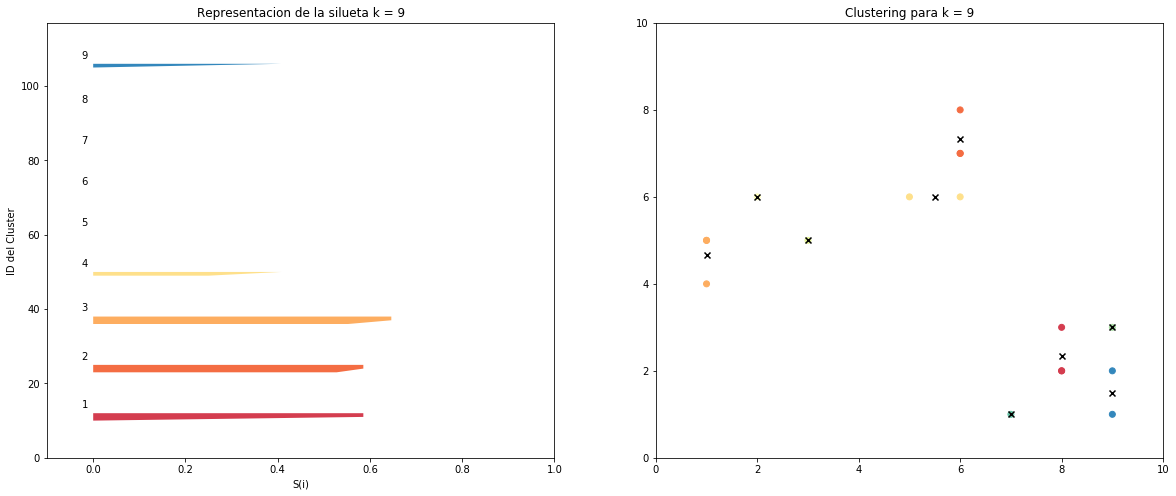

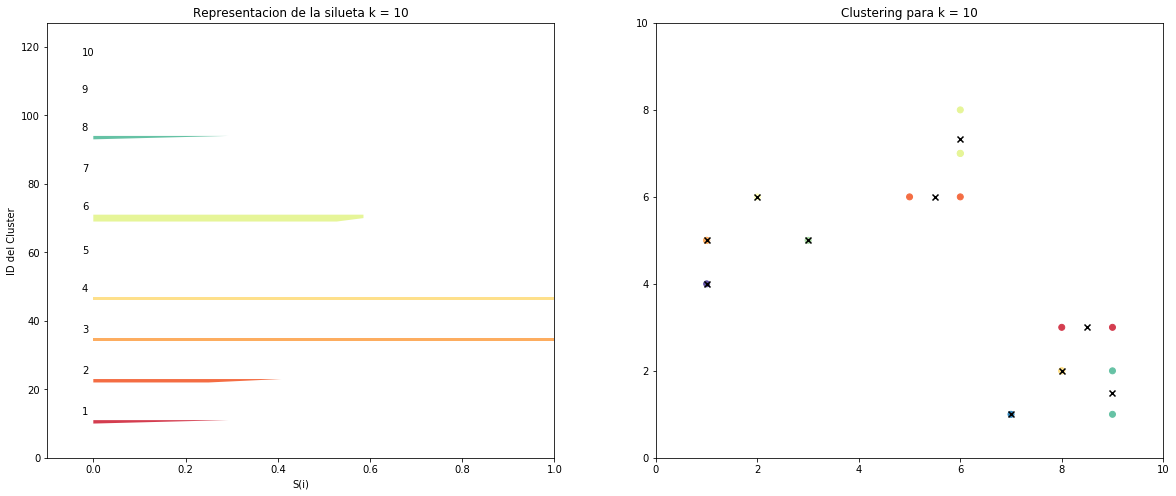

In [28]:
max_k = 10
K = range(1, max_k + 1)
ssw = []
color_palette = [plt.cm.Spectral(float(i)/max_k) for i in K]
centroid = [sum(X)/len(X) for i in K]
sst = sum( np.min((cdist(X, centroid, 'euclidean')), axis = 1) )

for k in K:
    kmeansModel = KMeans( n_clusters= k ).fit(X)
    centers =  pd.DataFrame(kmeansModel.cluster_centers_)
    labels = kmeansModel.labels_
    
    ssw_k = sum( np.min( cdist(X, kmeansModel.cluster_centers_, 'euclidean' ), axis = 1) )
    ssw.append( ssw_k )
    
    label_color = [color_palette[i] for i in labels]
    
    #Fabricamos una silueta para cada clusters
    if 1<k<len(X):
        #creamos un subplot
        fig, (axis1, axis2) = plt.subplots(1,2)
        fig.set_size_inches(20, 8)
        
        #el primer subplot contendra la silueta
        #En nuestro caso ya controlamos que los valores estan entre -.1 y 1
        
        axis1.set_xlim([-.1, 1.0])
        
        #el numero de clusters a insertar determinara cada barra
        #(el numero de cluster + 1 )* 10 sera el espacio en blanco q dejaremos entre 
        
        axis1.set_ylim( [0, len(X)+ (k+1)*10] )
        
        silhouette_avg = silhouette_score(X, labels)
        print('Para k = ',k,' el promedio de la silueta es: ', silhouette_avg)
        sample_silhouette_values = silhouette_samples(X, labels)
        
        y_lower = 10
        
        for i in range(k):
            #agregamos la silueta del cluster k
            ith_cluster_sv = sample_silhouette_values[labels == i]
            print("    -Para i =", i+1, " la silueta del cluster vale: ", np.mean(ith_cluster_sv))
            #ordenamos desendientemente las siluetas del cluster ith
            ith_cluster_sv.sort()
            
            #calculo de la ubicacion de la primera silueta
            ith_cluster_size = ith_cluster_sv.shape[0]
            y_upper = y_lower + ith_cluster_size
            
            color = color_palette[i] #color ith de la paleta
            
            axis1.fill_betweenx( np.arange( y_lower, y_upper),
                               0, ith_cluster_sv, facecolor = color, alpha = 1)
            #etiquetamos 
            axis1.text(-.025, y_lower + 0.5 + ith_cluster_size, str(i+1))
            
            #Calculamos el nuevo y_lower para el siguiente  cluster del grafico
            
            y_lower = y_upper + 10
        
        axis1.set_title('Representacion de la silueta k = %s'%str(k))
        axis1.set_xlabel('S(i)')
        axis1.set_ylabel('ID del Cluster')
        
        #fin de la representacion de la silueta
    
    #representacion de los k-means
    plt.plot()
    plt.xlim([0,10])
    plt.ylim([0,10])
    plt.title('Clustering para k = %s'%str(k))
    plt.scatter(x1, x2, c=label_color)
    plt.scatter(centers[0], centers[1], c='k', marker= 'x')

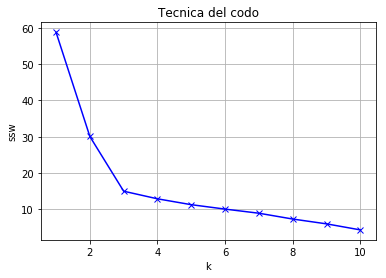

In [31]:
#representacion del codo
plt.plot(K, ssw, 'bx-')
plt.xlabel('k')
plt.ylabel('ssw')
plt.grid()
plt.title('Tecnica del codo')
plt.savefig('tecnicaDelCodo')